# Cross Validation

Tipos:

- Hold on
- K-CV
- LOOCV: Left Only One Cross Validation (Test is only one data point)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

from sklearn.metrics import  accuracy_score

In [49]:
dataset = pd.read_csv('felicidad.csv')
print(dataset.shape)
dataset.head()

(155, 12)


,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [29]:
X = dataset.drop(["country", "score"], axis=1)
y = dataset["score"]

## CV Score

In [31]:
model = DecisionTreeRegressor()
score = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
score

array([-0.20051659, -0.02197196, -0.02771717, -0.01709181, -0.02157027,
       -0.00771491, -0.02545319, -0.01699377, -0.21465556, -0.25699942])

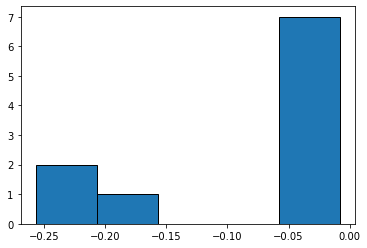

In [35]:
plt.hist(score, bins=5, edgecolor='black')
plt.show()

In [33]:
np.mean(score)

-0.08106846492224631

In [34]:
np.median(score)

-0.023712574949787776

## KFold

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=77)

In [53]:
for train, test in kf.split(dataset):
    print("="*32)
    print("###TRAIN###")
    print(train.tolist())
    print("###TEST###")
    print(test.tolist())

###TRAIN###
[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 75, 78, 79, 80, 81, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 139, 141, 142, 143, 145, 147, 149, 150, 151, 152, 154]
###TEST###
[5, 6, 13, 14, 26, 33, 44, 48, 49, 50, 67, 69, 74, 76, 77, 82, 86, 87, 88, 102, 103, 104, 115, 123, 136, 138, 140, 144, 146, 148, 153]
###TRAIN###
[0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 40, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 

In [50]:
n = 0
for train, test in kf.split(dataset):
    n = n + 1
#     print("="*32)
    dataset.loc[train.tolist(), "cv_set"] = n
#     print(dataset.loc[train.tolist()].head())
#     print(dataset.loc(test))

In [51]:
print(dataset.shape)
dataset.head()

(155, 13)


,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia,cv_set
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,5.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,4.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,5.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,5.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,5.0


## Randomized Search CV

In [60]:
model = RandomForestRegressor()

parameters = {
    'n_estimators': range(4, 16),
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': range(2, 11)
}

random_estimator = RandomizedSearchCV(model, parameters, n_iter=10, cv=3, scoring='neg_mean_squared_error').fit(X, y)

In [61]:
random_estimator.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=8)

In [62]:
random_estimator.best_params_

{'n_estimators': 8, 'max_depth': 8, 'criterion': 'squared_error'}

In [64]:
random_estimator.predict(X.loc[[0]])

array([7.45437509])

## AutoML sklearn

https://www.itmastersmag.com/noticias-analisis/que-es-automated-machine-learning-la-proxima-generacion-de-inteligencia-artificial/

https://automl.github.io/auto-sklearn/master/index.html

https://github.com/automl/auto-sklearn/tree/master/autosklearn/pipeline/components/classification

https://github.com/automl/auto-sklearn/tree/master/autosklearn/pipeline/components/regression

In [ ]:
import autosklearn.classification

cls = autosklearn.classification.AutoSklearnClassifier()

cls.fit(X_train, y_train)

predictions = cls.predict(X_test)